In [1]:
options(warn=-1)

library(TSCAN)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# utility function for setting plot dimensions
set_plot_dimensions = function(width_choice, height_choice) {
    options(repr.plot.width=width_choice, repr.plot.height=height_choice)}

In [3]:
## Using Imported PCA Representation
#-----------------------------------------------------------------
## extracting coordinates and cluster annotations
# PCA_coordinates = read.csv(file = '/scratch/PCA_coordinates.csv')
# rownames(PCA_coordinates) = PCA_coordinates[,'X']
# PCA_coordinates = PCA_coordinates[,2:ncol(PCA_coordinates)]
# clusterid = as.numeric(as.factor(PCA_coordinates['cluster',]))
# PCA_coordinates = PCA_coordinates[1:nrow(PCA_coordinates)-1,]
# names(clusterid) = colnames(PCA_coordinates)
## the reduce=F argument is crucial, without it the function performs SVD again
# PCA_cluster = exprmclust(PCA_coordinates,cluster=clusterid,reduce=F)
# set_plot_dimensions(20,20)
# plotmclust(PCA_cluster)+scale_shape_manual(values=c(1:50))
## mapping cells onto tree stem to generate pseudotime ordering
# PCA_cluster_order = TSCANorder(PCA_cluster)
# PCA_coordinates = read.csv(file = '/scratch/PCA_coordinates.csv')
# PCA_states = unique(PCA_cluster_order[,'State'])
## get the trajectory for clusters
# cat('Pseudotime ordering using PCA coordinates in UMAP cluster number: ' )
# for (state in PCA_states){
#     if (state!= PCA_states[length(PCA_states)]){
#         cat(paste(PCA_coordinates[nrow(PCA_coordinates),][,rownames(PCA_cluster_order[PCA_cluster_order['State']==state,])[1]],'--> '))
#         }
#     else{
#         cat(PCA_coordinates[nrow(PCA_coordinates),][,rownames(PCA_cluster_order[PCA_cluster_order['State']==state,])[1]])
#     }
# }

## Using Imported UMAP Coordinates

In [4]:
UMAP_coordinates = read.csv('/scratch/UMAP_coordinates.csv',row.names=1)

In [5]:
UMAP_coordinates

,ACGAGCCCAGGATTGG.1.0,AGCGTATAGGCACATG.1.0,ATCCACCGTCCTAGCG.1.0,ATTCTACGTAAGGGAA.1.0,ATTCTACTCAGATAAG.1.0,CAAGGCCAGCCAGTTT.1.0,CACATTTTCGTAGATC.1.0,CACCAGGAGCTGCAAG.1.0,CAGGTGCCAGCGATCC.1.0,CATTCGCCATCATCCC.1.0,...,TTTGTCAAGAGTCTGG.1.22,TTTGTCACAACTGCTA.1.22,TTTGTCACACGAAATA.1.22,TTTGTCACAGGAATCG.1.22,TTTGTCACATCTATGG.1.22,TTTGTCACATGAACCT.1.22,TTTGTCAGTACGCTGC.1.22,TTTGTCATCAACACCA.1.22,TTTGTCATCACCACCT.1.22,TTTGTCATCGGCGGTT.1.22
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UMAP_0,7.695529,7.525202,8.7401915,7.051599,6.858161,10.0927620,6.625099,6.544047,10.2598257,6.400382,...,6.526632,4.823844,6.045452,7.637938,8.230060,6.575059,5.510634,6.324291,7.387442,6.487526
UMAP_1,10.069707,1.925413,0.8431613,1.419961,1.965698,0.1039652,1.650886,3.544649,0.6363169,1.736073,...,6.642684,9.446560,8.151798,8.198316,6.919378,8.365280,9.939951,9.200327,9.293725,9.623561
cluster,1.000000,7.000000,8.0000000,7.000000,7.000000,8.0000000,7.000000,7.000000,8.0000000,7.000000,...,3.000000,0.000000,12.000000,3.000000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000


In [6]:
# casting the cluster annotation into natural number representing "states" as referred to by TSCAN
# this is necessar for TSCAN to work
clusterid = as.numeric(as.factor(UMAP_coordinates['cluster',]))
UMAP_coordinates = UMAP_coordinates[1:2,]
names(clusterid) = colnames(UMAP_coordinates)
# the reduce=F argument is crucial, without it the function performs SVD again
UMAP_cluster = exprmclust(UMAP_coordinates, cluster=clusterid, reduce=F)

In [7]:
UMAP_cluster = exprmclust(UMAP_coordinates, cluster=clusterid, reduce=F)

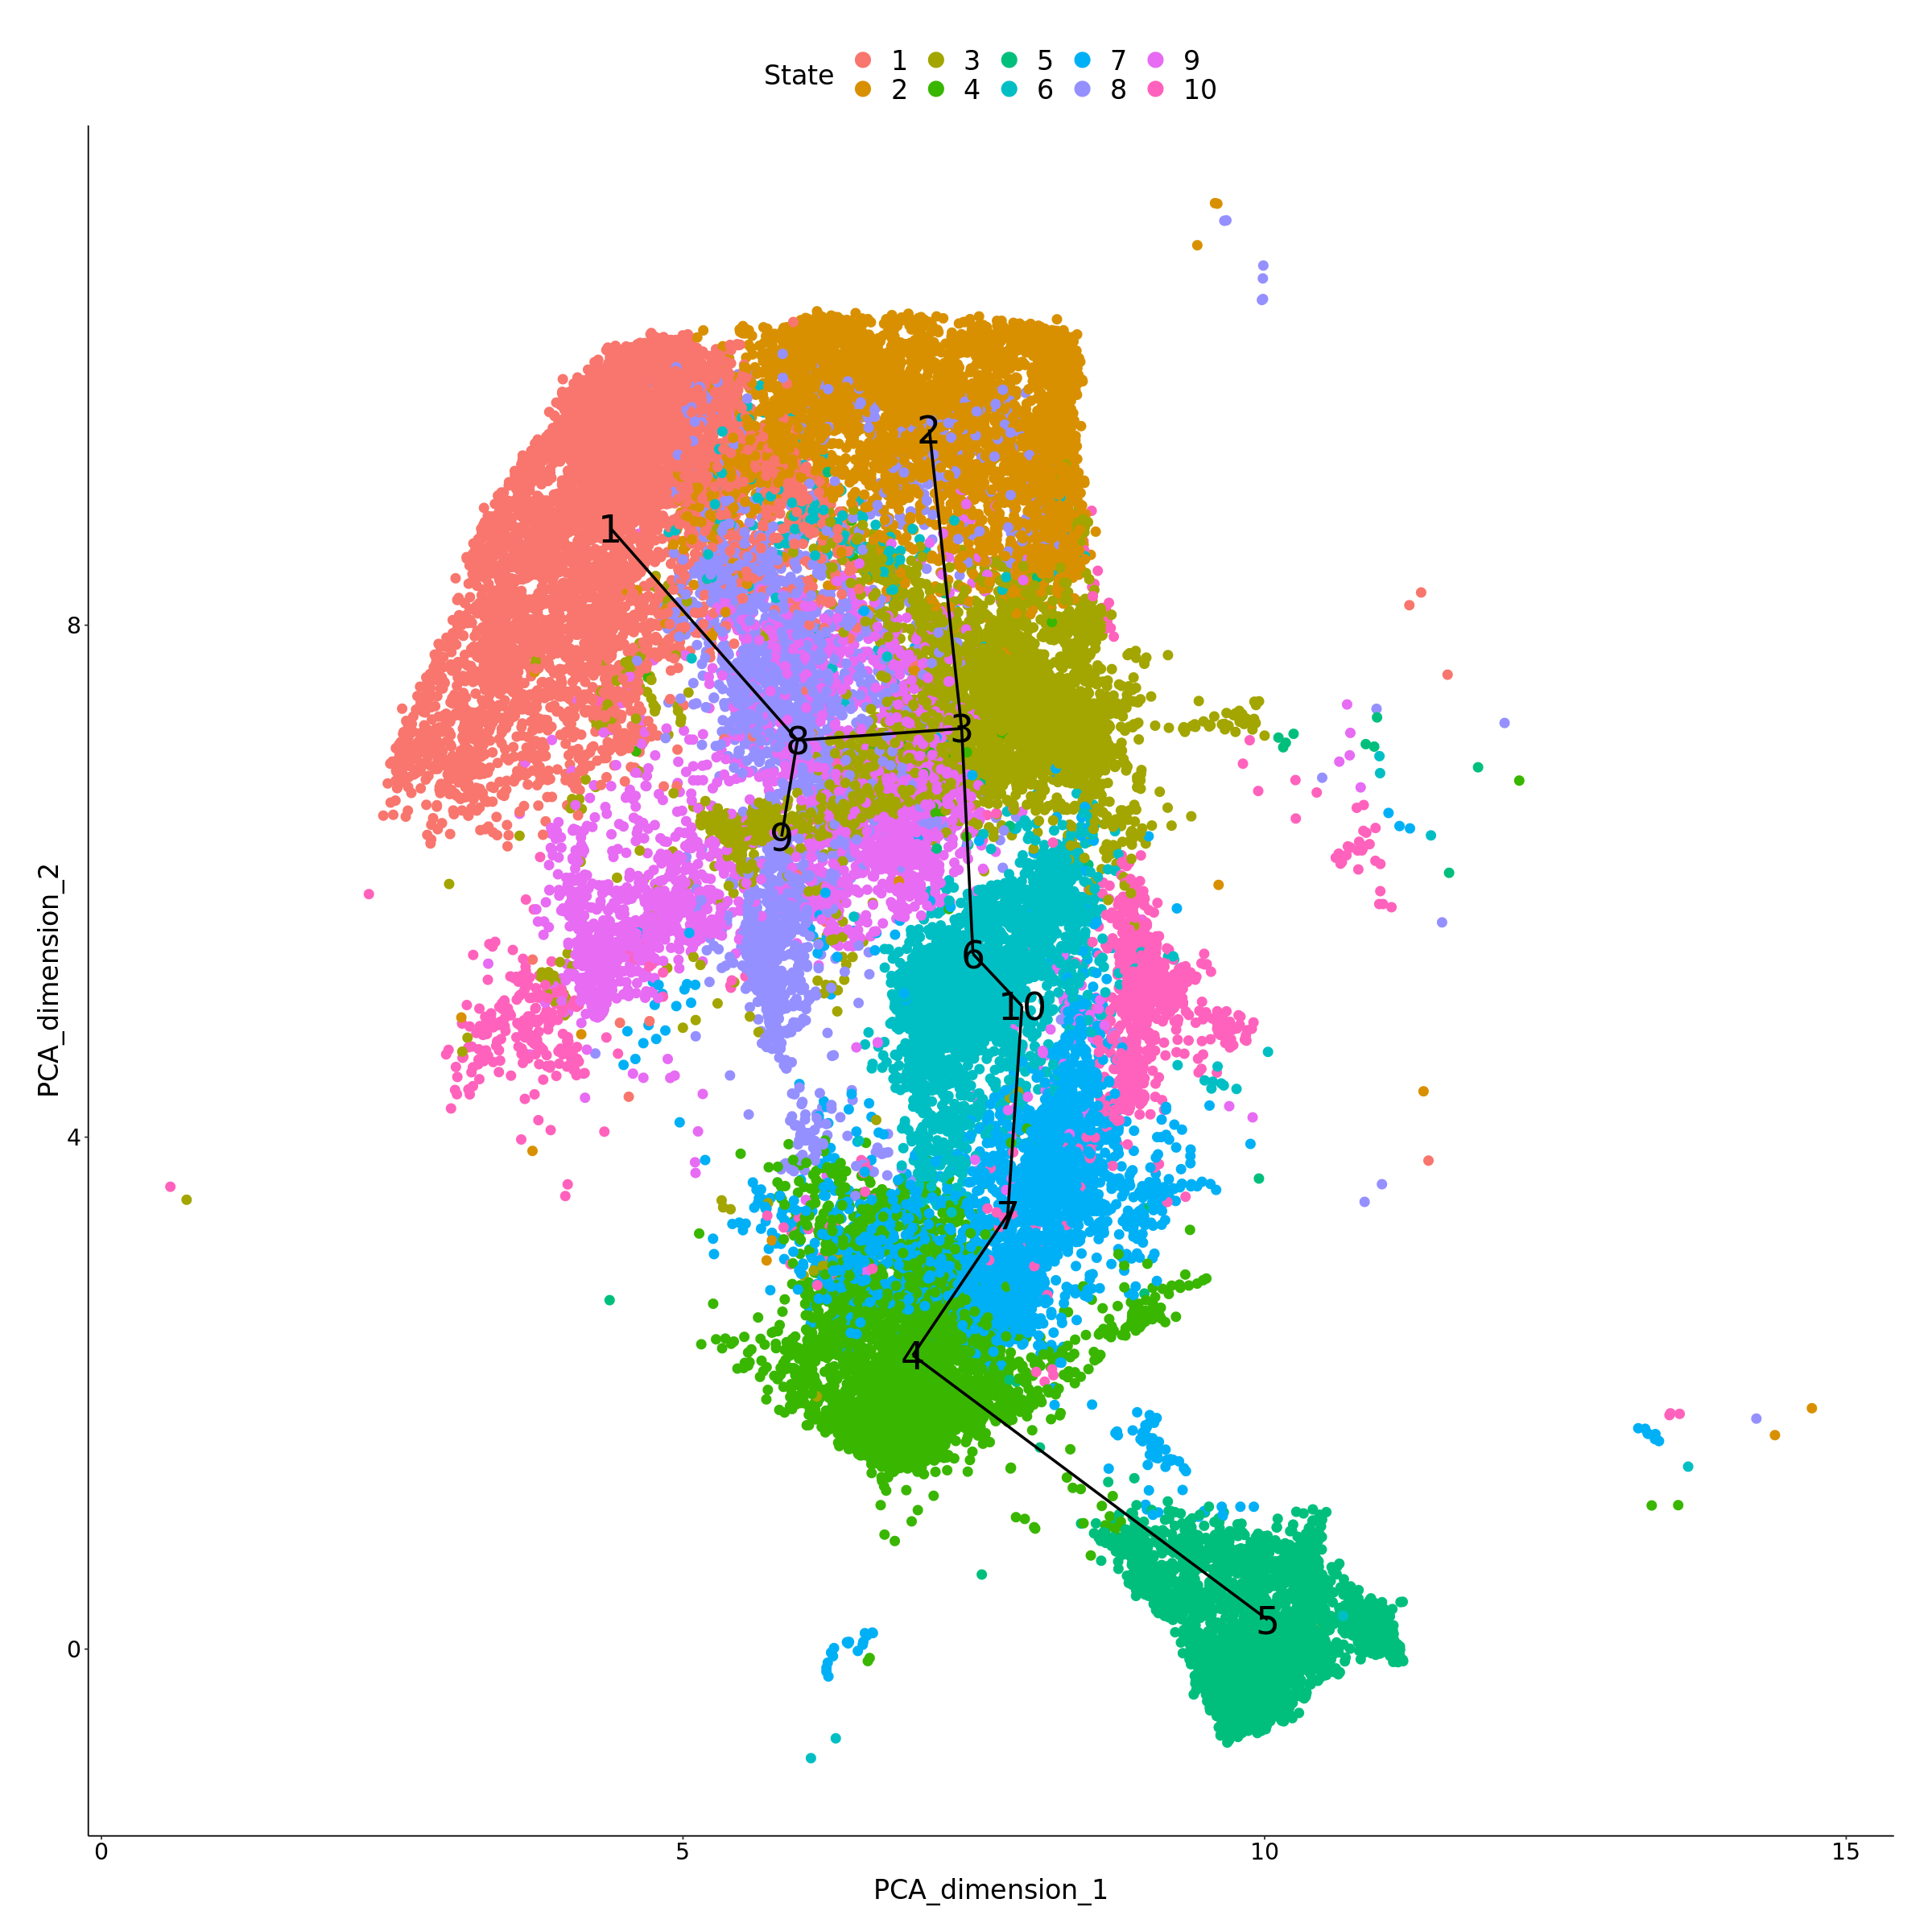

In [8]:
set_plot_dimensions(20,20)
plotmclust(UMAP_cluster)+scale_shape_manual(values=c(0:23))

In [9]:
UMAP_cluster_order = TSCANorder(UMAP_cluster)

In [10]:
UMAP_states = unique(UMAP_cluster_order[,'State'])

In [11]:
UMAP_coordinates = read.csv('/scratch/UMAP_coordinates.csv',row.names=1)

In [63]:
cluster_pseudotime_order = c()

cat('Pseudotime ordering using UMAP coordinates in UMAP cluster number: ' )
for (state in UMAP_states){
    if (state!= UMAP_states[length(UMAP_states)]){
        cat(paste(UMAP_coordinates[nrow(UMAP_coordinates),][,rownames(UMAP_cluster_order[UMAP_cluster_order['State']==state,])[1]],'--> '))
        cluster_pseudotime_order = c(cluster_order, UMAP_coordinates[nrow(UMAP_coordinates),][,rownames(UMAP_cluster_order[UMAP_cluster_order['State']==state,])[1]])
        }
    else{
        cat(UMAP_coordinates[nrow(UMAP_coordinates),][,rownames(UMAP_cluster_order[UMAP_cluster_order['State']==state,])[1]])
    }
}

cat('\n')
cat('We might need to reverse the order for interpretation.')

Pseudotime ordering using UMAP coordinates in UMAP cluster number: 0 --> 11 --> 3 --> 9 --> 18 --> 10 --> 7 --> 8
We might need to reverse the order for interpretation.

In [65]:
cluster_pseudotime_order = cluster_pseudotime_order[-length(cluster_pseudotime_order)]

## Differential Expression along Trajectory

In [14]:
#### Differential Expression along PCA defined trajectory
expression_matrix = read.csv('/scratch/trajectory_expression_data/exprMatrix.tsv',sep='\t',row.names=1)
#PCA_diffval = difftest(expression_matrix, PCA_cluster_order)
#row.names(PCA_diffval)[PCA_diffval$qval < 0.05]

#### Differential Expression along UMAP defined trajectory

In [44]:
expression_matrix = read.csv('/scratch/trajectory_expression_data/exprMatrix.tsv',sep='\t',row.names=1)
UMAP_diffval = difftest(expression_matrix, UMAP_cluster_order)

In [45]:
diff_exp_genes = row.names(UMAP_diffval)[UMAP_diffval$qval < 0.05]

In [67]:
# cast both the gene list and trajecotory into a dataframe for exporting
genes_and_peudotime = list()
genes_and_peudotime[['genes']] = diff_exp_genes
genes_and_peudotime[['order']] = cluster_pseudotime_order

In [68]:
write.table(genes_and_peudotime,file="/scratch/genes_and_peudotime.txt",row.names=FALSE)